In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
#Here is the Python code for constructing a boosted decision tree model with a 4D input and a 1D output (using y1 for the regression task). 
# The data is split into training, validation, and testing sets in a 60%, 20%, and 20% ratio, respectively. 
# The x1 feature and the target variable y1 are transformed using the provided functions.

In [32]:
df = pd.read_csv('dataset.csv')

# Define the transformation functions
def x_scale(x, p=7.5):
    return 1/p * np.log(1 + x * (np.exp(p) - 1))


#def y_scale(y):
 #   return np.log(1 + y) if y >= 0 else -np.log(1 - y)

def y_scale(y):
    return np.where(y >= 0, np.log(1 + y), -np.log(1 - y))



In [33]:
# Apply transformations
df['x1'] = x_scale(df['x1'])
#df['y1'] = df['y1'].apply(y_scale)
df['y1'] = y_scale(df['y1'])

# Splitting the data into input features and target variable
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y1']  # I am are choosing y1 for the regression task

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
# Splitting the data into training, validation, and testing sets (60%, 20%, 20%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [6]:
# Setting up the model with initial hyperparameters

    n_estimators=150,  # number of boosting stages to be run
    max_depth= 4,  # maximum depth of each tree
    min_samples_split=2,  # minimum samples required to split an internal node
    min_samples_leaf=1  # minimum samples required to be at a leaf node
)

# Training the modelmodel = GradientBoostingRegressor(
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=150)

In [7]:

print("Test set accuracy: {:.4f}".format(model.score(X_test,y_test)))

Test set accuracy: 0.9851


In [8]:
# Evaluating the model on the validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")


# Evaluating the model on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Validation MSE: 0.1954950492195494
Test MSE: 0.19630991064985087


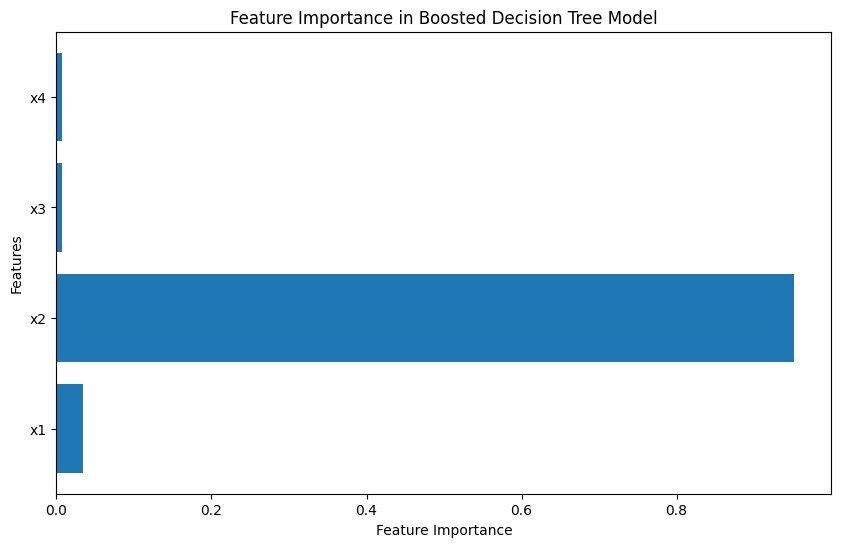

In [9]:
# Plotting the feature importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Boosted Decision Tree Model')
plt.show()

In [14]:
from sklearn.model_selection import KFold
#will use k as 10



In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)


for train_index, test_index in kfold.split(df):
    # Print the indices of the train and test sets
    print('Train indices:', train_index)
    print('Test indices:', test_index)
    
    # Print the actual train and test DataFrames
    print('Train data:\n', df.iloc[train_index])
    print('Test data:\n', df.iloc[test_index])


In [28]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC

In [41]:
NUM_TRIALS = 30

p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)


In [46]:
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)

   #Y is continuous
    print("Labels unique values:", np.unique(y))
    print("Labels data type:", y.dtype)

    

    # Non-nested parameter search and scoring
    try:
        clf_non_nested = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv, error_score='raise')
        clf_non_nested.fit(X, y)
        non_nested_scores[i] = clf_non_nested.best_score_
    except ValueError as e:
        print(f"Non-nested CV error: {e}")
        non_nested_scores[i] = np.nan  # Set to NaN in case of error
        
    # Nested CV with parameter optimization
    clf_nested = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, error_score='raise')
    nested_score = cross_val_score(clf_nested, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

Labels unique values: [-10.26124567  -9.51326317  -9.38847485 ...   9.46639765   9.53504595
   9.65724291]
Labels data type: float64
Non-nested CV error: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py", line 970, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py", line 1527, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py", line 916, in evaluate_candidates
    out = parallel(
          ^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\parallel.py", line 67, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\parallel.py", line 129, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py", line 739, in _validate_targets
    check_classification_targets(y)
  File "c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
